<a href="https://colab.research.google.com/github/LucaNoto/PF_CoderHouse/blob/main/projeto_coder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

&nbsp; &nbsp;Segundo a Agência Brasil a cidade de São Paulo registrou 4,41 casos de homicídio para cada 100 mil habitantes nos últimos 12 meses, de novembro de 2021 a outubro deste ano. A taxa é a menor dos últimos 22 anos, de acordo com balanço das estatísticas criminais, divulgado hoje (25), pela Secretaria de Estado da Segurança Pública (SSP-SP). 

&nbsp; &nbsp;Em 2022, foram registrados 528 assassinatos. Nos dez primeiros meses do ano, a redução do índice foi 17% na comparação com igual período de 2019. Foram 91 registros a menos neste ano. Em relação a outubro de 2019, a redução é de 8,1%, passando de 62 casos para 57.

&nbsp; &nbsp;A SSP-SP informou que a análise dos dados criminais considera o ano de 2019 por ser o período anterior à pandemia, quando não havia restrição para circulação de pessoas. O índice de isolamento, calculado pelo Instituto de Pesquisas Tecnológicas (IPT), chegou a 45%, na média, em 2020.
Neste estudo iremos analisar os dados.

fonte:https://agenciabrasil.ebc.com.br/geral/noticia/2022-11/taxa-de-homicidio-em-sao-paulo-e-441-cada-100-mil-habitantes#:~:text=A%20cidade%20de%20S%C3%A3o%20Paulo,P%C3%BAblica%20(SSP%2DSP).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
from folium import plugins


from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
df=pd.read_csv('dfMortesCompilado.csv')
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,NUM_VITIMA,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,...,COR_PELE,PROFISSAO,NATUREZA_APURADA,CRIME,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,10108,2019-01-01 07:56:59,3,2019,S.PAULO,...,Branca,NAO INFORMADA,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,10101,2019-01-18 16:32:41,372,2019,S.PAULO,...,Parda,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
2,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,10102,2019-01-25 22:53:07,490,2019,S.PAULO,...,Preta,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,10342,2019-01-20 00:15:18,534,2019,S.PAULO,...,Amarela,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
4,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,10342,2019-01-23 00:07:25,624,2019,S.PAULO,...,Branca,NAO INFORMADA,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df.columns)

34

# **Quais são as nossas variáveis?**

In [4]:
print("os nomes das variáveis :\n", list(df.columns))

os nomes das variáveis :
 ['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO', 'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'NUM_VITIMA', 'ID_DELEGACIA', 'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA', 'CRIME', 'DESDOBRAMENTO', 'DESCR_PERIODO', 'FLAG_VITIMA_FATAL', 'CONDUTA', 'COORPORACAO', 'SITUACAO']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602 entries, 0 to 3601
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPARTAMENTO_CIRCUNSCRICAO  3602 non-null   object 
 1   SECCIONAL_CIRCUNSCRICAO     3602 non-null   object 
 2   MUNICIPIO_CIRCUNSCRICAO     3602 non-null   object 
 3   DP_CIRCUNSCRICAO            3602 non-null   object 
 4   NUM_VITIMA                  2549 non-null   float64
 5   ID_DELEGACIA                3602 non-null   object 
 6   DATAHORA_REGISTRO_BO        3597 non-null   object 
 7   NUM_BO                      3602 non-null   object 
 8   ANO_BO                      3602 non-null   object 
 9   MUNICIPIO_ELABORACAO        3602 non-null   object 
 10  DP_ELABORACAO               3602 non-null   object 
 11  SEC_ELABORACAO              3602 non-null   object 
 12  DEP_ELABORACAO              3602 non-null   object 
 13  DATA_FATO                   3602 

# **1.Limpeza de dados**

É o processo de detecção e correção de registros corrompidos ou imprecisos de um conjunto de dados

### **Lidando com dados ausentes**

In [6]:
# Quais são os valores totais ausentes no conjunto de dados ?
print("A base de dados possui: ", df.isna().sum().sum(),'dados ausentes')

A base de dados possui:  22366 dados ausentes


In [7]:
# Vamos contar o número de dados ausentes por coluna
missing_values = list(df.isna().sum())
# valores ausentes é uma lista do número de valores ausentes em cada coluna

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # fazendo um dicionário para os valores ausentes

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Fazendo um dataframe personalizado a partir do dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,NUM_VITIMA,DATAHORA_REGISTRO_BO,HORA_FATO,DESC_TIPOLOCAL,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,PROFISSAO,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
Missing Values,0,1053,5,7,1,632,747,747,421,456,1126,2554,3602,2616,3125,2637,2637


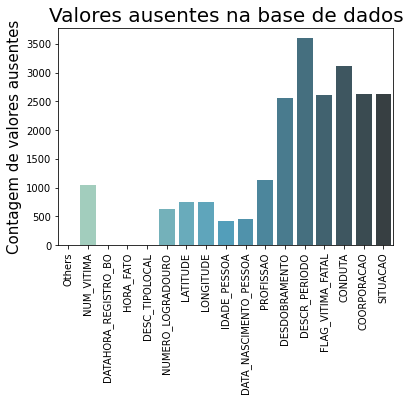

In [8]:
# Plotando os valores ausentes
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Valores ausentes na base de dados", fontdict = {'fontsize': 20})
plt.ylabel("Contagem de valores ausentes", fontdict={'fontsize': 15})
plt.show()

### **Por que essa quantidade de valores ausentes ?**

&nbsp; &nbsp; Ao analisar a base percebe-se que a maioria das informações que aparece como 'NaN' são sobre a situação da ocorrência. Como os dados são de 2019 à 2022 informações como 'desdobramento','Situação', entre outros.Ainda podem ser preenchidas ao fim do processo.<p>
&nbsp; &nbsp; A variável 'FLAG_VITIMA_FATAL' só é preenchida quando ocorre flagrante, é um termo jurídico usado para indicar que um criminoso foi pego no momento em que cometia um crime, o que na maioria dos caso não ocorre.
Como neste estudo a gente só quer ver onde foi registrado o crime essas variáveis serão deletadas.<p>
&nbsp; &nbsp; Ainda temos alguns dados relevantes que também estão ausentes, dados como Latitude, Longitude, idade, etc. Como esses recursos não são valores numéricos diretos, não podemos usar funções estatísticas resumidas para preencher os valores ausentes.
Portanto, removeremos esses valores do conjunto de dados.<p>


In [ ]:
#tirando as variáveis que possuem muitos valores ausentes
df=df.drop(columns=['NUM_VITIMA','PROFISSAO','DESDOBRAMENTO','DESCR_PERIODO','FLAG_VITIMA_FATAL','CONDUTA','COORPORACAO','SITUACAO'])

In [ ]:
df = df.dropna()

In [ ]:
#tem uma linha com valor de latitude e longitude = RDO NÃO LOCALIZADO por isso vamos retirar também
df=df[df.LONGITUDE!='RDO NÃO LOCALIZADO']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2445 entries, 0 to 3599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DEPARTAMENTO_CIRCUNSCRICAO  2445 non-null   object
 1   SECCIONAL_CIRCUNSCRICAO     2445 non-null   object
 2   MUNICIPIO_CIRCUNSCRICAO     2445 non-null   object
 3   DP_CIRCUNSCRICAO            2445 non-null   object
 4   ID_DELEGACIA                2445 non-null   object
 5   DATAHORA_REGISTRO_BO        2445 non-null   object
 6   NUM_BO                      2445 non-null   object
 7   ANO_BO                      2445 non-null   object
 8   MUNICIPIO_ELABORACAO        2445 non-null   object
 9   DP_ELABORACAO               2445 non-null   object
 10  SEC_ELABORACAO              2445 non-null   object
 11  DEP_ELABORACAO              2445 non-null   object
 12  DATA_FATO                   2445 non-null   object
 13  HORA_FATO                   2445 non-null   obje

Só tem variáveis do tipo: object

In [ ]:
#Quantos dados foram retidos após essa remoção
print(f'retidos na base: {round(2445/3602*100,2)}%')

retidos na base: 67.88%


### **2.Visualização de dados**

Nesta seçao apresentamos alguns gráficos que irão permitir entender como é a nossa base.

In [ ]:
dfbackup = df

In [ ]:
df["ID"] = df.index

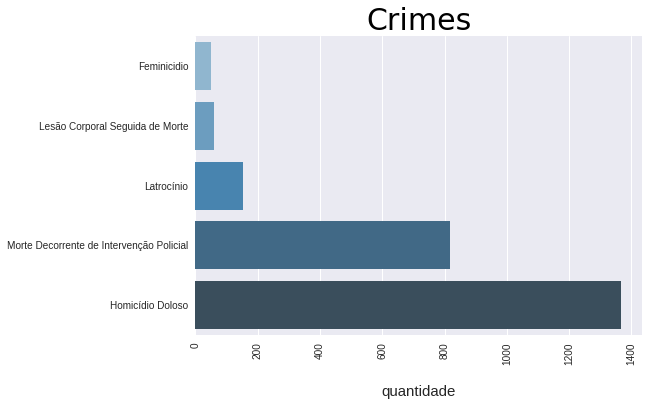

In [ ]:
plt.style.use('seaborn')

count_crimes = df['CRIME'].value_counts().sort_values(ascending=False)

temp = df.groupby('CRIME', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='CRIME', data=temp, palette="Blues_d")


plt.title("Crimes", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nquantidade", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()


Usando o Bokeh para gerar o mesmo gráfico

In [ ]:
temp.head()
temp.columns=['Crime','Number']
temp.index=[0,1,2,3,4]
temp['co-ordinates']=[1,2,3,4,5]
temp.head()

,Crime,Number,co-ordinates
0,Feminicidio,49,1
1,Lesão Corporal Seguida de Morte,61,2
2,Latrocínio,152,3
3,Morte Decorrente de Intervenção Policial,818,4
4,Homicídio Doloso,1365,5


In [ ]:
# Making an interactive plot in Bokeh

from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

temp_cds = ColumnDataSource(temp)

fig1 = figure(plot_width=700, plot_height=400, title="Maiores ocorrencias de Crimes de morte em SP",
             x_axis_label="contagem de Crimes", y_axis_label="tipo de crime", x_range=(0, 1500))

fig1.title.align = "left"
fig1.title.text_color = "black"
fig1.title.text_font_size = "20px"

fig1.hbar(y='co-ordinates', right='Number', source=temp_cds, left=0, color='red', alpha=0.5, height=0.50)
fig1.yaxis.major_label_overrides = {5: 'Homicídio Doloso', 4:'Morte Decorrente de Intervenção Policial', 3:'Latrocínio', 2:'Lesão Corporal Seguida de Morte',
                                   1:'Feminicidio'}

# Adding passive interactivity
tooltips = [
    ('Mortes', '@Number'),
]

#fig1.legend.location
fig1.add_tools(HoverTool(tooltips=tooltips))

output_notebook()
show(fig1)

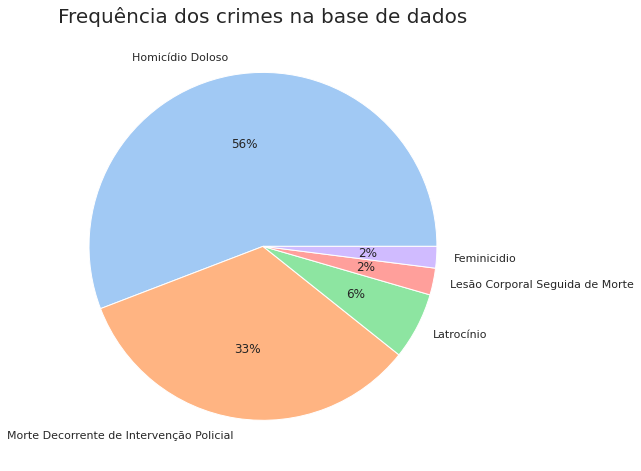

In [ ]:
crime_counts = df.CRIME.value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(crime_counts.keys())
y = list(crime_counts.values)

# sns.barplot(x=x, y=y, palette="GnBu_d")
plt.pie(y,labels=x,colors = sns.color_palette('pastel')[0:len(x)], autopct='%.0f%%')

plt.title("Frequência dos crimes na base de dados", fontdict = {'fontsize': 20})
plt.show()

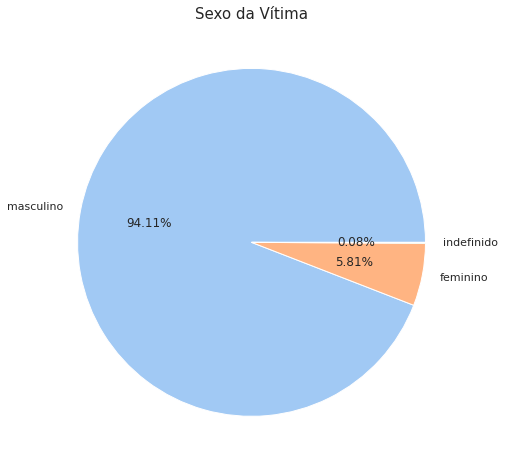

In [ ]:
sex_counts = df.SEXO_PESSOA.str.strip().str.lower().value_counts()

sns.set(rc={'figure.figsize':(18,8)})

x = list(sex_counts.keys())
y = list(sex_counts.values)
plt.pie(y,labels=x,colors = sns.color_palette('pastel')[0:len(x)], autopct='%.2f%%')
plt.xticks(rotation=70)
plt.title("Sexo da Vítima", fontdict = {'fontsize': 15})

plt.show()

In [ ]:
df.COR_PELE.unique()

array(['Branca', 'Parda', 'Amarela', 'Preta', 'Ignorada', 'Vermelha',
       'Preta               ', 'Branca              ', 'Não informada'],
      dtype=object)

In [ ]:
df['COR_PELE'] = df['COR_PELE'].str.replace(" ", "")

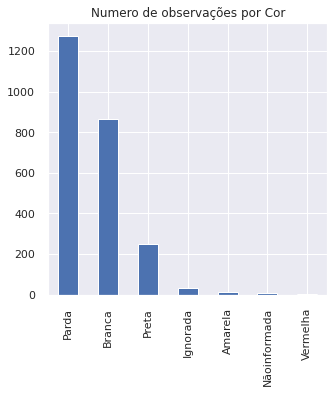

In [ ]:
plt.figure(figsize = (5,5))
plt.title("Numero de observações por Cor")
df["COR_PELE"].value_counts().plot(kind = 'bar')

In [ ]:
dfClean=dfbackup
df=dfbackup

In [ ]:
def generateAbsoluteGroupBy(var1,var2):
    df1 = dfClean.groupby([var1,var2]).size().reset_index().rename(columns={0:'Count'})

    return df1

def generateFrequencyGroupBy(var1,var2):
    df1 = dfClean.groupby([var1,var2]).agg({var2: 'count'})
    df2 = df1.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).rename(columns={var2:'Frequency'}).reset_index()

    return df2

def generateSubplots(df,variable):

    crimes = list(df['CRIME'].unique())

    fig, axes = plt.subplots(len(crimes),1,figsize=(15, len(crimes)*4), sharey=True)

    for i,c in enumerate(crimes):
        sns.lineplot(data=df[df['CRIME']==c], x=variable, y="Frequency",ax=axes[i],color=sns.color_palette()[i])
        axes[i].set_xlabel("")
        axes[i].set_title(c)
        if i==len(crimes)-1:
            plt.xlabel(variable)

In [ ]:
map_sec = {
    "1ª SEC" : "1º SEC - CENTRO",
    "DEL.SEC.1º CENTRO" : "1º SEC - CENTRO",
    "2ª SEC" : "2º SEC - SUL",
    "DEL.SEC.2º SUL" : "2º SEC - SUL",
    "3ª SEC" : "3º SEC - OESTE",
    "DEL.SEC.3º OESTE" : "3º SEC - OESTE",
    "4ª SEC" : "4º SEC - NORTE",
    "DEL.SEC.4º NORTE" : "4º SEC - NORTE",
    "5ª SEC" : "5ª SEC - LESTE",
    "DEL.SEC.5º LESTE " : "5º SEC - LESTE",
    "6ª SEC" : "6º SEC - SANTO AMARO",
    "DEL.SEC.6º SANTO AMARO" : "6º SEC - SANTO AMARO",
    "7ª SEC" : "7º SEC - ITAQUERA",
    "DEL.SEC.7º ITAQUERA" : "7º SEC - ITAQUERA",
    "8ª SEC" : "8º SEC - SAO MATEUS",
    "DEL.SEC.8º SAO MATEUS" : "8º SEC - SAO MATEUS"}

dfClean.SECCIONAL_CIRCUNSCRICAO = dfClean.SECCIONAL_CIRCUNSCRICAO.map(map_sec)

dfClean.SEXO_PESSOA = dfClean.SEXO_PESSOA.str.strip().str.lower()
dfClean.COR_PELE = dfClean.COR_PELE.str.strip().replace({'Ignorada':'Ignorada/Não Informada','Não informada':'Ignorada/Não Informada'})

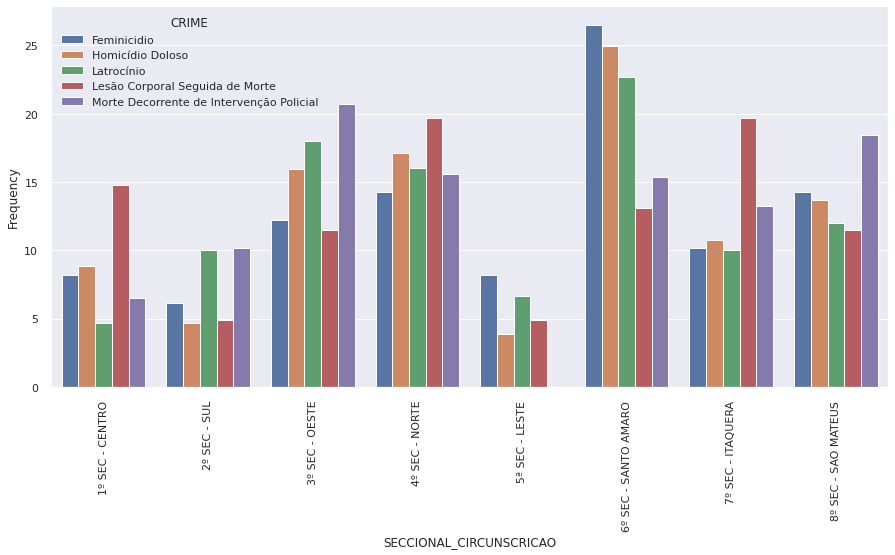

In [ ]:
variable = 'SECCIONAL_CIRCUNSCRICAO'

df = generateFrequencyGroupBy('CRIME',variable)

fig, ax = plt.subplots(figsize=(15,7))

plt.xticks(rotation=90)
sns.barplot(data=df, x=variable, y="Frequency", hue="CRIME")

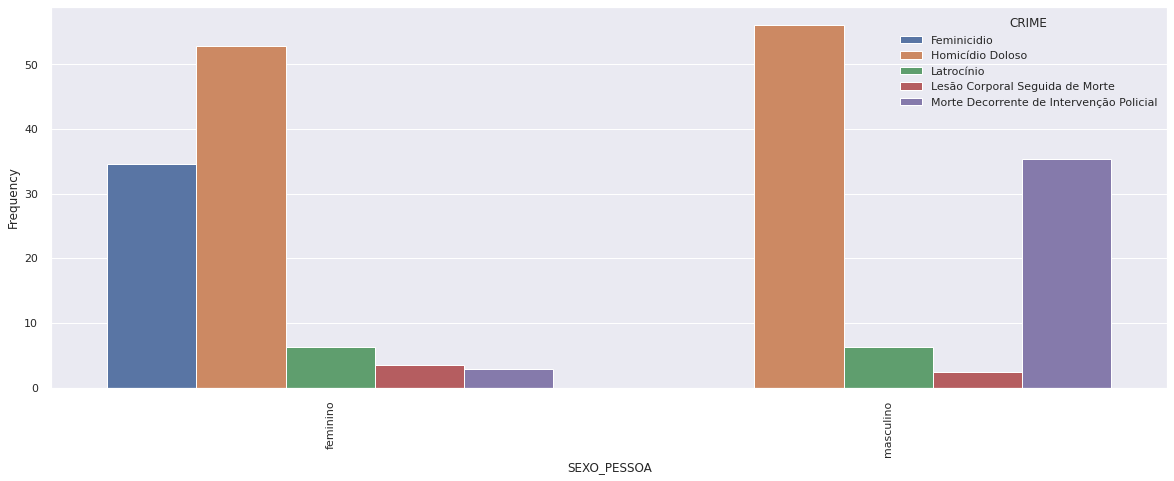

In [ ]:
variable = 'SEXO_PESSOA'

df = generateFrequencyGroupBy(variable,'CRIME')
df2 = df[df[variable].isin(['feminino','masculino'])]

fig, ax = plt.subplots(figsize=(20,7))

plt.xticks(rotation=90)
sns.barplot(data=df2, x=variable, y="Frequency", hue="CRIME")

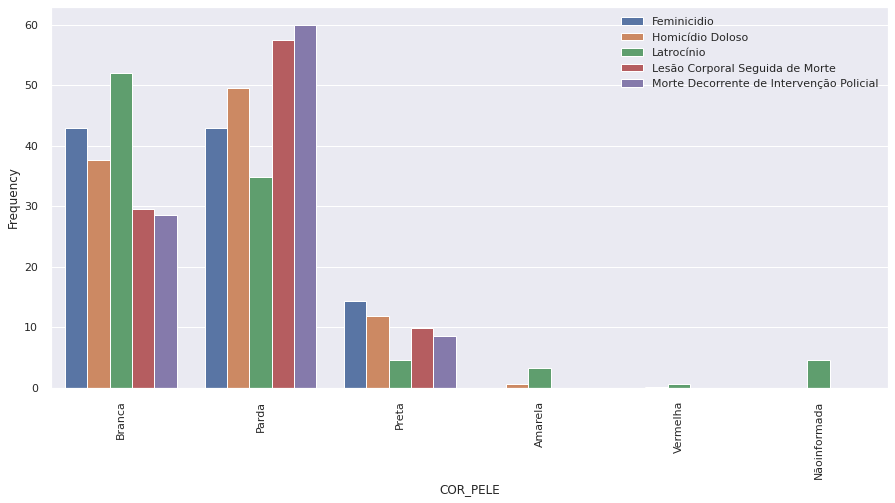

In [ ]:
variable = 'COR_PELE'

df = generateFrequencyGroupBy('CRIME',variable)
df2 = df[df[variable]!='Ignorada/Não Informada']

fig, ax = plt.subplots(figsize=(15,7))

plt.xticks(rotation=90)

sns.barplot(data=df2, x=variable, y="Frequency", hue="CRIME")
plt.legend(loc='upper right')

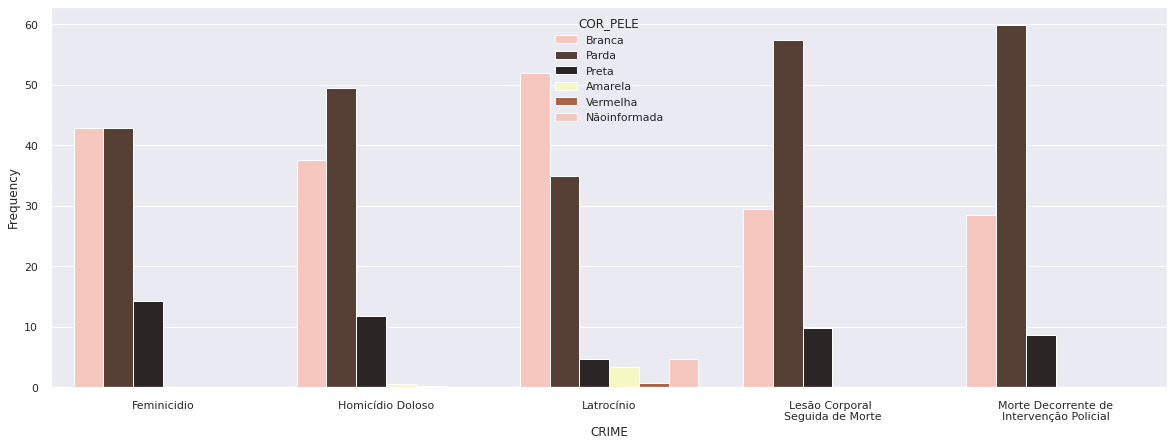

In [ ]:
variable = 'COR_PELE'

df = generateFrequencyGroupBy('CRIME',variable)
df2 = df[df[variable]!='Ignorada/Não Informada'].replace({'Lesão Corporal Seguida de Morte':'Lesão Corporal \nSeguida de Morte','Morte Decorrente de Intervenção Policial':'Morte Decorrente de\nIntervenção Policial'})

fig, ax = plt.subplots(figsize=(20,7))


sns.barplot(data=df2, x='CRIME', y="Frequency", hue=variable,palette= sns.color_palette(['#FFC1B6','#5C3D2E','#2D2424','#FDFFBC','#B85C38']))

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2445 entries, 0 to 3599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DEPARTAMENTO_CIRCUNSCRICAO  2445 non-null   object
 1   SECCIONAL_CIRCUNSCRICAO     2394 non-null   object
 2   MUNICIPIO_CIRCUNSCRICAO     2445 non-null   object
 3   DP_CIRCUNSCRICAO            2445 non-null   object
 4   ID_DELEGACIA                2445 non-null   object
 5   DATAHORA_REGISTRO_BO        2445 non-null   object
 6   NUM_BO                      2445 non-null   object
 7   ANO_BO                      2445 non-null   object
 8   MUNICIPIO_ELABORACAO        2445 non-null   object
 9   DP_ELABORACAO               2445 non-null   object
 10  SEC_ELABORACAO              2445 non-null   object
 11  DEP_ELABORACAO              2445 non-null   object
 12  DATA_FATO                   2445 non-null   object
 13  HORA_FATO                   2445 non-null   obje

In [ ]:
dfClean['TIPO_PESSOA'] = dfClean['TIPO_PESSOA'].str.strip().str.upper()

In [ ]:
dfClean['TIPO_PESSOA'].value_counts()

VÍTIMA                  1638
AUTOR/VITIMA             742
ADOLESCENTE INF/VIT       44
ADOLESCENTE               12
INDICIADO                  7
ENCONTRO DE CADÁVER        1
ADOLESCENTE INFRATOR       1
Name: TIPO_PESSOA, dtype: int64

In [ ]:
dfClean = dfClean[dfClean['TIPO_PESSOA']=='VÍTIMA']

In [ ]:
dfClean = dfClean[dfClean['TIPO_PESSOA']=='VÍTIMA']
dfClean['DATAHORA_REGISTRO_BO'] = pd.to_datetime(dfClean['DATAHORA_REGISTRO_BO'])
dfClean['DATA_FATO'] = pd.to_datetime(dfClean['DATA_FATO'])
dfClean['HORA_FATO_DT'] = pd.to_datetime(dfClean['HORA_FATO'],errors = 'coerce').dt.strftime('%H')


dfClean['ANO_BO'] = dfClean['ANO_BO'].astype(str)
dfClean['NUM_BO'] = dfClean['NUM_BO'].astype(str)

dfClean['MES_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%m')
dfClean['DIA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%d')
dfClean['HORA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%H')
dfClean['DIA_SEMANA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.dayofweek

dfClean['ANO_FATO'] = dfClean['DATA_FATO'].dt.strftime('%Y')
dfClean['MES_FATO'] = dfClean['DATA_FATO'].dt.strftime('%m')
dfClean['DIA_FATO'] = dfClean['DATA_FATO'].dt.strftime('%d')
dfClean['DIA_SEMANA_FATO'] = dfClean['DATA_FATO'].dt.dayofweek

In [ ]:
# Demora uns 40min pra rodar!!!

dfClean["LAT_LONG"] = dfClean["LATITUDE"].astype(str) + ',' + dfClean['LONGITUDE'].astype(str)

locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.5)

dfClean['RESPONSE_GEOLOCATOR'] = dfClean["LAT_LONG"].apply(rgeocode)

In [ ]:
lat_lon=[-23.58633467412642, -46.60418260319519]

Analises geográficas 

In [ ]:
df= dfbackup

from folium import plugins
coordenadas=[]
for lat,lon in zip(df.LATITUDE[:2445],df.LONGITUDE[:2445]):
  coordenadas.append([lat,lon])

sp=folium.Map(location=[lat_lon[0],lat_lon[1]],zoom_start=10,tiles='cartodbpositron')
sp.add_child(plugins.HeatMap(coordenadas))
sp

In [ ]:
colorDict = {'Feminicidio':'blue',
            'Homicídio Doloso':'orange',
            'Morte Decorrente de Intervenção Policial':'purple',
            'Latrocínio':'green',
            'Lesão Corporal Seguida de Morte':'red'}

df['COLOR'] = df['CRIME']
df['COLOR'] = df['COLOR'].map(colorDict)

In [ ]:
start_lat_lon=[-23.58633467412642, -46.60418260319519]

my_map = folium.Map(location=start_lat_lon, zoom_start=10)
# add all the point from the file to the map object using FastMarkerCluster

for lat,lon,color in zip(df['LATITUDE'], df['LONGITUDE'],df['COLOR']):
    folium.Circle( location=[ lat, lon],fill=True, fill_color=color, radius=500,fill_opacity=1, stroke=False).add_to(my_map)
my_map

In [ ]:
from folium.plugins import MarkerCluster

mapa=folium.Map(location=[lat_lon[0],lat_lon[1]],zoom_start=10,tiles='cartodbpositron')

local=[]
for lat,lon in zip(df.LATITUDE[:2445],df.LONGITUDE[:2445]):
  local.append([float(lat),float(lon)])

MarkerCluster(locations=local).add_to(mapa)
mapa

### 3. Clusterização

Clusterizar significa agrupar qualquer tipo de dados de acordo com suas características que são incomuns, sejam elas: cor, tamanho, tipo ou peso.
Nesta etapa do estudo, iremos analisar diferentes formas de clusterização que podem ser aplicadas à base de  dados separada na etapa anterior, de crimes no município de São Paulo.
Os crimes serão clusterizados pela posição geográfica da ocorrência, representada pela Latitude e Longitude.

In [ ]:
df=dfbackup

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
dfLatLong = df[['LATITUDE','LONGITUDE']].drop([3483,3172])
dfLatLong['LATITUDE'] = dfLatLong['LATITUDE'].astype(float)
dfLatLong['LONGITUDE'] = dfLatLong['LONGITUDE'].astype(float)
dfLatLong

,LATITUDE,LONGITUDE
0,-23.546215,-46.631733
1,-23.554690,-46.629651
3,-23.560415,-46.633707
4,-23.562964,-46.645501
8,-23.607535,-46.595688
...,...,...
3593,-23.617517,-46.450839
3594,-23.611482,-46.727947
3596,-23.686127,-46.709649
3597,-23.602041,-46.484026


(-46.84231446473463, -46.346061266266574, -23.9443901835, -23.3470005885)

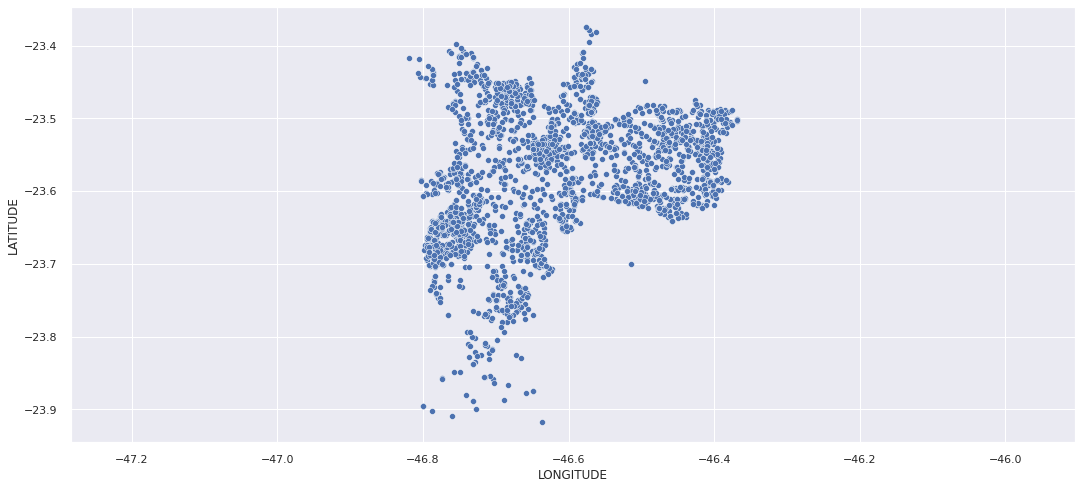

In [ ]:
sns.scatterplot(x=dfLatLong.LONGITUDE,y=dfLatLong.LATITUDE)
plt.axis('equal')

DBScan

Esse método tem como objetivo identificar clusters de formato arbitrário e de diferentes tamanhos, identificar e separar os ruídos dos dados e detectar clusters “naturais”, por exemplo, clusters que seriam 
O método requer dois parâmetros para gerar os clusters:
Distância mínima entre os pontos
Número mínimo de pontos por cluster
Para encontrar os valores ideais para ambos os parâmetros, após testarmos alguns valores manualmente, criamos dois loops para variar ambos.


 0    2393
-1      26
 1      18
 2       6
dtype: int64


(-46.84231446473463, -46.346061266266574, -23.9443901835, -23.3470005885)

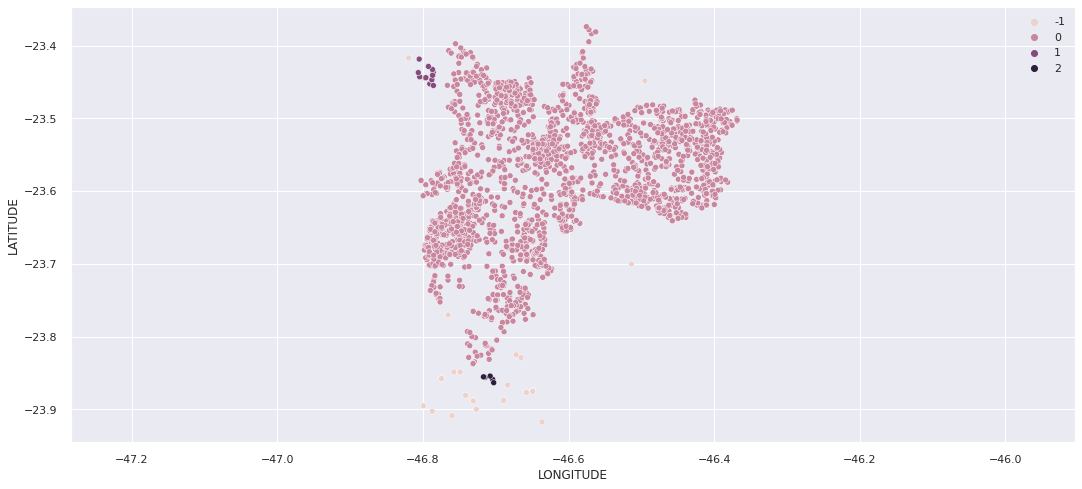

In [ ]:
DBS = DBSCAN(eps = 0.017, min_samples=5).fit(dfLatLong)
y_DBS = DBS.labels_
print(pd.Index(y_DBS).value_counts())

sns.scatterplot(x=dfLatLong.LONGITUDE,y=dfLatLong.LATITUDE,hue=y_DBS)
plt.axis('equal')

In [ ]:
print("Silhouette Coefficient: ", metrics.silhouette_score(dfLatLong, y_DBS))

Silhouette Coefficient:  0.11218383945951167


O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster. Ou seja,
os crimes de homicídos na cidade de São Paulo não são casos isolados em regiões distantes, essas ocorrências acontecem muito próximos uns dos outros.

In [ ]:
import numpy as np
epsList = np.arange(start = 0.01, stop = 1, step = 0.01)
minSamplesList = np.arange(start = 1, stop = 100, step = 1)


silhouette_scores_DF=pd.DataFrame()

for eps_value in epsList:
    for minSample_value in minSamplesList:
        # print(eps_value,minSample_value)
        
        db = DBSCAN(eps=eps_value, min_samples=minSample_value)
        
        if(len(np.unique(db.fit_predict(dfLatLong)))>1):
            score=silhouette_score(dfLatLong, db.fit_predict(dfLatLong))
        else:
            score = np.NaN
            continue

        clusterValueCount = pd.Index(db.labels_).value_counts()
        clusterNumber = len(clusterValueCount)
        try:
            unclusteredPoints = clusterValueCount[-1]
        except:
            unclusteredPoints = 0
            
        silhouette_scores_DF=silhouette_scores_DF.append(pd.DataFrame(data=[[score,eps_value,minSample_value,clusterNumber,unclusteredPoints]], columns=["score", "eps", "minSample", "clusters","unclustered"]))


In [ ]:
silhouette_scores_DF

,score,eps,minSample,clusters,unclustered
0,-0.259339,0.01,1,70,0
0,-0.204842,0.01,2,44,27
0,-0.148683,0.01,3,27,61
0,-0.000528,0.01,4,28,80
0,-0.020574,0.01,5,32,117
...,...,...,...,...,...
0,0.446532,0.09,95,2,4
0,0.446532,0.09,96,2,4
0,0.446532,0.09,97,2,4
0,0.446532,0.09,98,2,4


In [ ]:
silhouette_scores_DF.to_excel('silhouette_scores_DF.xlsx')

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(silhouette_scores_DF, x='eps', y='minSample', z='score',size=[0.1]*len(silhouette_scores_DF),opacity=1)
fig.show()

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Mesh3d(
                        x=silhouette_scores_DF.eps, 
                        y=silhouette_scores_DF.minSample, 
                        z=silhouette_scores_DF.score,
                        colorbar_title='z',
                        colorscale='thermal',
                        showscale=True
                        )])

fig.update_layout(title='Variação Score', autosize=False,
                    scene = dict(
                    xaxis_title='eps',
                    yaxis_title='minSample',
                    zaxis_title='score'),
                    width=700,
                    margin=dict(l=65, r=50, b=65, t=90))
fig.show()


In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Mesh3d(
                        x=silhouette_scores_DF.eps, 
                        y=silhouette_scores_DF.minSample, 
                        z=silhouette_scores_DF.clusters,
                        colorbar_title='z',
                        colorscale='thermal',
                        showscale=True
                        )])

fig.update_layout(title='Número de Clusters', autosize=False,
                    scene = dict(
                    xaxis_title='eps',
                    yaxis_title='minSample',
                    zaxis_title='score'),
                    width=700,
                    margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Mesh3d(
                        x=silhouette_scores_DF.eps, 
                        y=silhouette_scores_DF.minSample, 
                        z=silhouette_scores_DF.unclustered,
                        colorbar_title='z',
                        colorscale='thermal',
                        showscale=True
                        )])

fig.update_layout(title='Pontos Sem Cluster', autosize=False,
                    scene = dict(
                    xaxis_title='eps',
                    yaxis_title='minSample',
                    zaxis_title='score'),
                    width=700,
                    margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Mesh3d(
                        x=silhouette_scores_DF.eps, 
                        y=silhouette_scores_DF.minSample, 
                        z=silhouette_scores_DF.score,
                        opacity=0.5,
                        color='red'
                        ))

fig.add_trace(go.Mesh3d(
                        x=silhouette_scores_DF.eps, 
                        y=silhouette_scores_DF.minSample, 
                        z=silhouette_scores_DF.clusters,
                        opacity=0.5,
                        color='green'
                        ))

fig.add_trace(go.Mesh3d(
                        x=silhouette_scores_DF.eps, 
                        y=silhouette_scores_DF.minSample, 
                        z=silhouette_scores_DF.unclustered,
                        opacity=0.5,
                        color='blue'
                        ))
                        
fig.update_layout(title='Variação Score', autosize=False,
                    scene = dict(
                    xaxis_title='eps',
                    yaxis_title='minSample',
                    zaxis_title='score'),
                    width=700,
                    margin=dict(l=65, r=50, b=65, t=90))
fig.show()

KMEANS

A ideia do algoritmo K-Means (também chamado de K-Médias) é fornecer uma classificação de informações de acordo com os próprios dados. Esta classificação, como será vista a seguir, é baseada em análise e comparações entre os valores numéricos dos dados. Desta maneira, o algoritmo automaticamente vai fornecer uma classificação automática sem a necessidade de nenhuma supervisão humana, ou seja, sem nenhuma pré-classificação existente.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

O KElbowVisualizer calcula a soma das distâncias quadradas de cada ponto ao seu centro atribuído, também exibe a quantidade de tempo para treinar o modelo de agrupamento na linha verde tracejada, mas pode ser ocultada.
Por padrão, o parâmetro locate_elbow (linha tracejada preta) é definido como encontrar automaticamente o “cotovelo” corresponde ao valor ideal de k usando o “algoritmo de detecção do ponto do joelho”. 


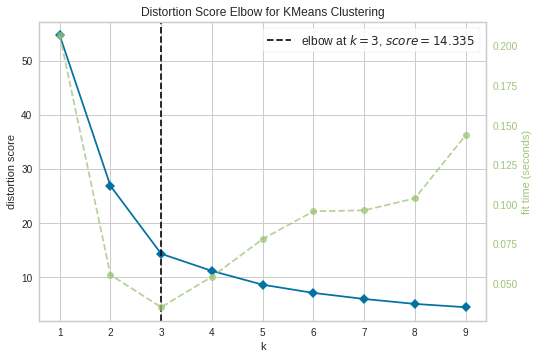

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(dfLatLong)            
visualizer.show()

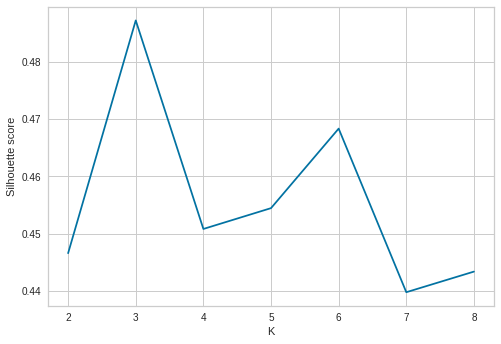

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters = num_clusters, init = "k-means++", random_state = 42)
  kmeans.fit(dfLatLong)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(dfLatLong, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel("K") 
plt.ylabel("Silhouette score") 
plt.show()

**Silhouette Visualizer**

O Coeficiente de Silhueta é usado quando a verdade básica sobre o conjunto de dados é desconhecida e calcula a densidade de clusters computados pelo modelo. A pontuação é calculada pela média do coeficiente de silhueta para cada amostra, calculada como a diferença entre a distância média intra-aglomerado e a distância média do cluster mais próximo para cada amostra, normalizada pelo valor máximo. Isso produz uma pontuação entre 1 e -1, onde 1 é clusters altamente densos e -1 é clustering completamente incorreto.


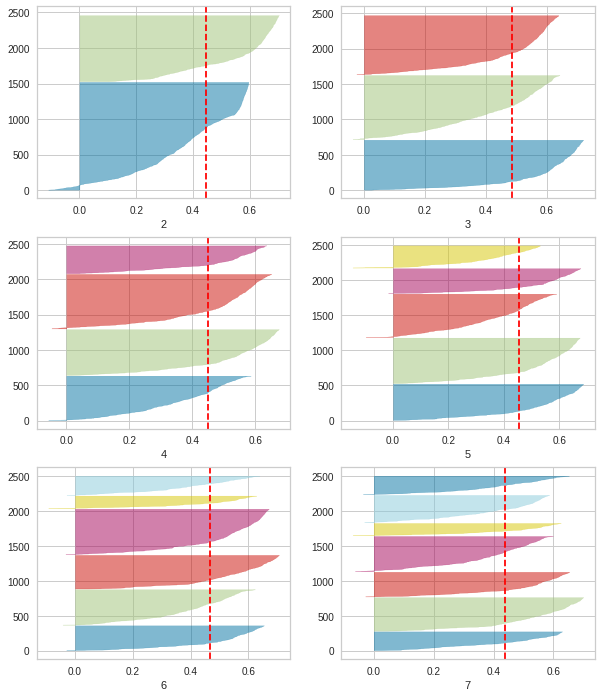

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
for i in [2, 3, 4, 5, 6, 7]:
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(kmeans, colors = "yellowbrick", ax=ax[q-1][mod])
    visualizer.ax.set_xlabel(str(i))
    visualizer.fit(dfLatLong)

K-MEDOIDS/PAM

O problema k -medoids é um problema de cluster semelhante ao k - means
Ambos os algoritmos k -means e k -medoids são particionais (quebrando o conjunto de dados em grupos) e tentam minimizar a distância entre os pontos rotulados como pertencentes a um cluster e um ponto designado como o centro desse cluster. k -medoids escolhe pontos de dados reais como centros permitindo maior interpretabilidade dos centros de cluster do que em k -means.


In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.6 MB/s eta 0:00:00


In [ ]:

from sklearn_extra.cluster import KMedoids

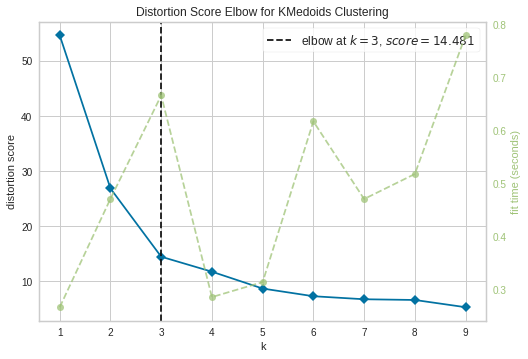

In [ ]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(dfLatLong)            
visualizer.show()

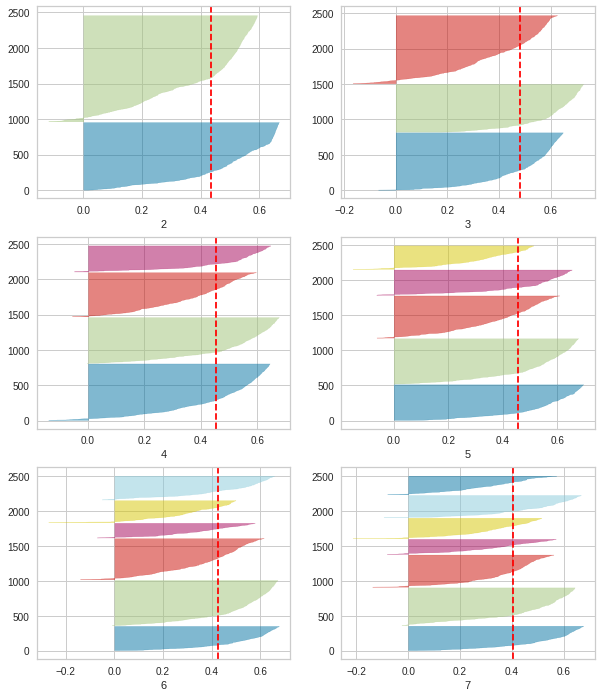

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
for i in [2, 3, 4, 5, 6, 7]:
    kmedoids = KMedoids(n_clusters = i, init = "k-medoids++", random_state = 42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(kmedoids, colors = "yellowbrick", ax=ax[q-1][mod])
    visualizer.ax.set_xlabel(str(i))
    visualizer.fit(dfLatLong)

### Hierárquico

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

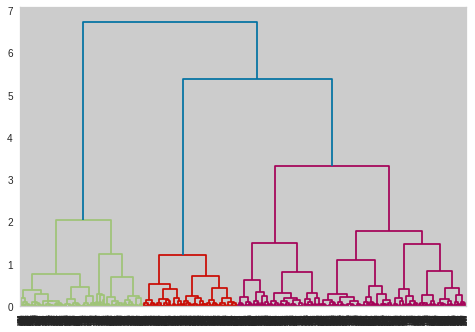

In [ ]:
dend = shc.dendrogram(shc.linkage(dfLatLong, method='ward'))

**HDBSCAN**

HDBSCAN é um algoritmo de agrupamento desenvolvido por Campello, Moulavi e Sander . Ele estende o DBSCAN convertendo-o em um algoritmo de clustering hierárquico e, em seguida, usando uma técnica para extrair um clustering plano com base na estabilidade dos clusters.


In [ ]:
pip install hdbscan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700856 sha256=439a9e6298ebd5d3c5722b46c30369ce9b5de3276d8255259eccf4cba936d1b2
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
dfLatLong.head()

,LATITUDE,LONGITUDE
0,-23.546215,-46.631733
1,-23.554690,-46.629651
3,-23.560415,-46.633707
4,-23.562964,-46.645501
8,-23.607535,-46.595688


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(dfLatLong)

HDBSCAN(gen_min_span_tree=True)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37])

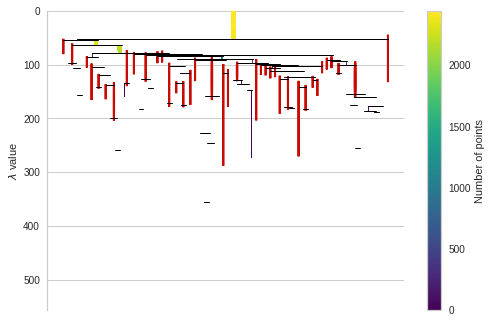

In [ ]:
hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, min_samples = 5)
labels = hdbscan.fit_predict(dfLatLong)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)